## **Anova Testing**

- A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possiblemarketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales,the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location and the weekly sales of the new item are recorded for the first four weeks

    - Columns MarketID: unique identifier for market 
    - MarketSize: size of market area by sales 
    - LocationID: unique identifier for store location 
    - AgeOfStore: age of store in years 
    - Promotion: one of three promotions that were tested week: one of four weeks when the promotions were run 
    - SalesInThousands: sales amount for a specific LocationID, Promotion, and week

**Importing library and data**

In [44]:
# Libraries
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multicomp import MultiComparison

In [45]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.width', 500)
df = pd.read_csv("../data/WA_Marketing-Campaign.csv")
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73000
1,1,Medium,1,4,3,2,35.67000
2,1,Medium,1,4,3,3,29.03000
3,1,Medium,1,4,3,4,39.25000
4,1,Medium,2,5,2,1,27.81000


In [46]:
df['Promotion'].value_counts()

Promotion
3    188
2    188
1    172
Name: count, dtype: int64

In [47]:
def check_df(dataframe, head = 5):
    print("############## Shape ##############")
    print(dataframe.shape)
    print("############## Types ##############")
    print(dataframe.dtypes)
    print("############## Head ##############")
    print(dataframe.head(head))
    print("############## Tail ##############")
    print(dataframe.tail(head))
    print("############## NA ##############")
    print(dataframe.isnull().sum())
    print("############## Quantiles ##############")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

############## Shape ##############
(548, 7)
############## Types ##############
MarketID              int64
MarketSize           object
LocationID            int64
AgeOfStore            int64
Promotion             int64
week                  int64
SalesInThousands    float64
dtype: object
############## Head ##############
   MarketID MarketSize  LocationID  AgeOfStore  Promotion  week  SalesInThousands
0         1     Medium           1           4          3     1          33.73000
1         1     Medium           1           4          3     2          35.67000
2         1     Medium           1           4          3     3          29.03000
3         1     Medium           1           4          3     4          39.25000
4         1     Medium           2           5          2     1          27.81000
############## Tail ##############
     MarketID MarketSize  LocationID  AgeOfStore  Promotion  week  SalesInThousands
543        10      Large         919           2          1    

In [48]:
# Let's Analyse Sales on the diffracture of Promotion
df.groupby("Promotion").agg({"SalesInThousands": ["mean", "count", "sum"]})

SalesInThousands                  
                      mean count         sum
Promotion                                   
1                 58.09901   172  9993.03000
2                 47.32941   188  8897.93000
3                 55.36447   188 10408.52000

In [49]:
# Let's Analyse Sales on the diffracture of Promotion and Marketsize
df.groupby(["MarketSize","Promotion"]).agg({"SalesInThousands":["count", "mean", "sum"]})

SalesInThousands                    
                                count     mean        sum
MarketSize Promotion                                     
Large      1                       56 75.23589 4213.21000
           2                       64 60.32203 3860.61000
           3                       48 77.20396 3705.79000
Medium     1                       96 47.67260 4576.57000
           2                      108 39.11435 4224.35000
           3                      116 45.46888 5274.39000
Small      1                       20 60.16250 1203.25000
           2                       16 50.81063  812.97000
           3                       24 59.51417 1428.34000

/space/hotel/hienng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/space/hotel/hienng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/space/hotel/hienng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/space/hotel/hienng/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conv

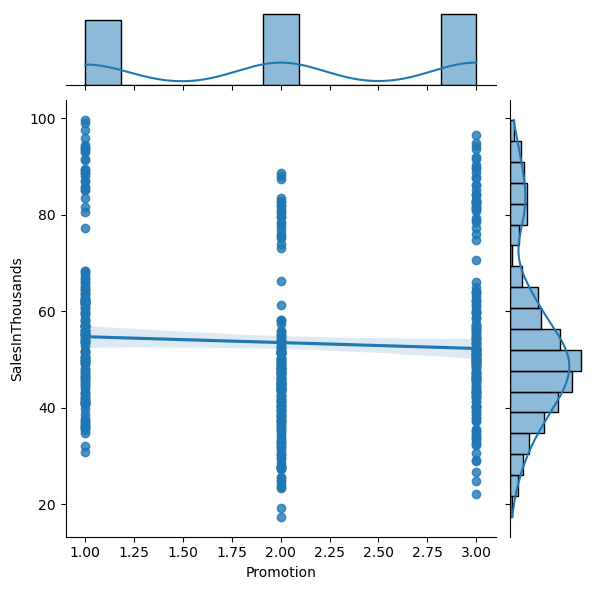

In [50]:
# Let's see some graphs
sns.jointplot(x = "Promotion", y = "SalesInThousands", data = df, kind = "reg");

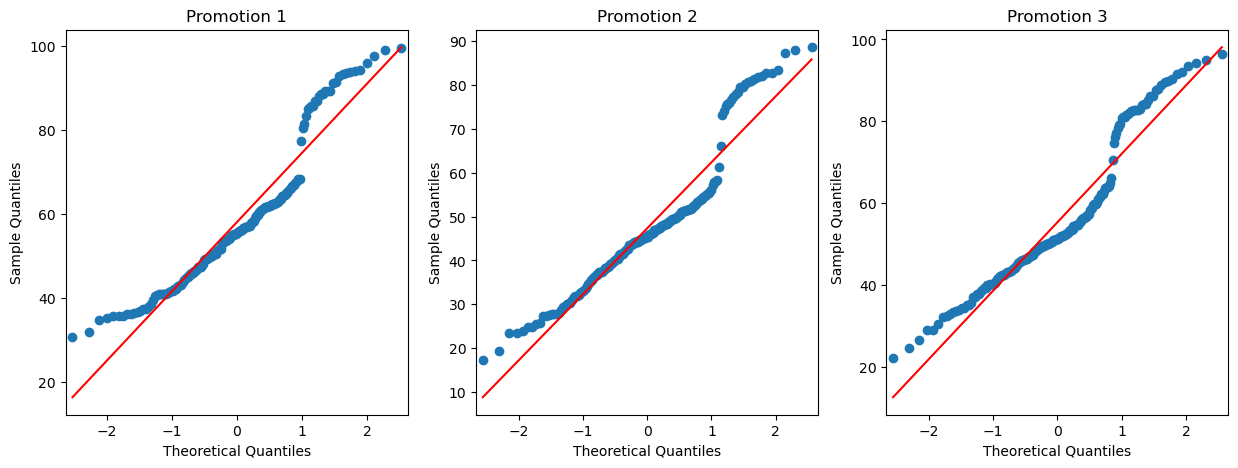

In [51]:
fig , axs = plt.subplots(1,3,figsize=(15,5))

qqplot(np.array(df.loc[(df["Promotion"] == 1), "SalesInThousands"]), line="s", ax=axs[0])
qqplot(np.array(df.loc[(df["Promotion"] == 2), "SalesInThousands"]), line="s", ax=axs[1])
qqplot(np.array(df.loc[(df["Promotion"] == 3), "SalesInThousands"]), line="s", ax=axs[2])

axs[0].set_title("Promotion 1")
axs[1].set_title("Promotion 2")
axs[2].set_title("Promotion 3")
plt.show()

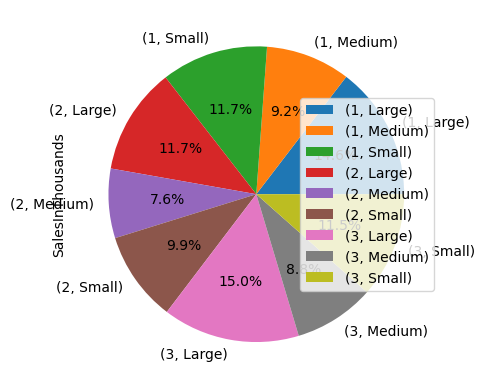

In [52]:

df.groupby(["Promotion", "MarketSize"]).agg({"SalesInThousands": "mean"}).plot(kind = "pie", autopct = '%1.1f%%', subplots=True);

## **ANOVA(Analysis of Variance) TEST**

**Hypothesis Formulation H0: M1 = M2 = M3 -> There isnot a statistically significant difference between Sales of he Promotions H1: M1 != M2 != M3 -> There is a statistically significant difference between Sales of he Promotions**

In [53]:
# Normality Assumption - Shapiro Wilk

# H0: The normality assumption is met.
# H1: The normality assumption is not met.

for group in list(df["Promotion"].unique()):
    pvalue = shapiro(df.loc[df["Promotion"] == group, "SalesInThousands"])[1]
    print(group, 'p-value: %.4f' % pvalue)
    
# P-value < 0.05 H0 is rejected. normality assumption is not met.

3 p-value: 0.0000
2 p-value: 0.0000
1 p-value: 0.0000


In [54]:
# Variance Homogeneity - Levene

# H0 = The variance homogeneity is met.
# H1 = The variance homogeneity is not met.

test_stat, pvalue = levene(df.loc[df['Promotion'] == 1, "SalesInThousands"],
                           df.loc[df['Promotion'] == 2, "SalesInThousands"],
                           df.loc[df['Promotion'] == 3, "SalesInThousands"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

# P-value > 0.05 H0 is not rejected. The variances are homogenous

Test Stat = 1.2697, p-value = 0.2818


In [55]:
# I decided to apply Non-parametric Anova Test

kruskal(df.loc[df['Promotion'] == 1, "SalesInThousands"],
               df.loc[df['Promotion'] == 2, "SalesInThousands"],
               df.loc[df['Promotion'] == 3, "SalesInThousands"])

KruskalResult(statistic=53.29475169322799, pvalue=2.6741866266697816e-12)

In [56]:
# Let's see pvalue more mathematical form to understand better
test_stat, pvalue = kruskal(df.loc[df['Promotion'] == 1, "SalesInThousands"],
                            df.loc[df['Promotion'] == 2, "SalesInThousands"],
                            df.loc[df['Promotion'] == 3, "SalesInThousands"])

print("pvalue: ", "%.3f" % pvalue)

# p_value < 0.05 is rejected. There is a statistically significant difference between Promotions

pvalue:  0.000


In [57]:
from scipy.stats import mannwhitneyu

# Grouping sales data by promotion level
sales_promotion_1 = df.loc[df['Promotion'] == 1, "SalesInThousands"]
sales_promotion_2 = df.loc[df['Promotion'] == 2, "SalesInThousands"]
sales_promotion_3 = df.loc[df['Promotion'] == 3, "SalesInThousands"]

# Performing the Mann-Whitney U test
test_stat, pvalue = mannwhitneyu(sales_promotion_1, sales_promotion_2)
print("Promotion 1 vs. Promotion 2 p-value: ", "%.3f" % pvalue)

test_stat, pvalue = mannwhitneyu(sales_promotion_1, sales_promotion_3)
print("Promotion 1 vs. Promotion 3 p-value: ", "%.3f" % pvalue)

test_stat, pvalue = mannwhitneyu(sales_promotion_2, sales_promotion_3)
print("Promotion 2 vs. Promotion 3 p-value: ", "%.3f" % pvalue)


Promotion 1 vs. Promotion 2 p-value:  0.000
Promotion 1 vs. Promotion 3 p-value:  0.035
Promotion 2 vs. Promotion 3 p-value:  0.000


- This table presents the results of a Tukey Honestly Significant Difference (HSD) test, which is a `post hoc test` commonly used after conducting an `Analysis of Variance (ANOVA)`. The test compares the means of multiple groups to determine if there are statistically significant differences between them

In [58]:
# There is a meaningful difference, but which one. We need to look at that.
comparison = MultiComparison(df["SalesInThousands"], df["Promotion"])
tukey = comparison.tukeyhsd(0.05)
print(tukey.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


- The comparison between `group 1` and `group 2` has a **significant mean difference of approximately -10.7696**. The `adjusted p-value` is very small (p < 0.05), indicating that this difference is statistically significant. Therefore, we reject the `null hypothesis` and conclude that there is a significant difference between the means of group 1 and group 2.

- The comparison between `group 2` and `group 3` has a significant mean difference of approximately 8.0351. The adjusted `p-value` is very small (p < 0.05), indicating that this difference is statistically significant. Therefore, we reject the `null hypothesis` and conclude that there is a significant difference between the means of group 2 and group 3.